## Загрузка и первоначальное изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
!pip install gdown

In [3]:
CARS_URL = 'https://drive.google.com/file/d/1liFEe1-yFISPSpRSvbv1wIH_avYNGmBI/view?usp=sharing'
CARS_FILE_ID = '1liFEe1-yFISPSpRSvbv1wIH_avYNGmBI'

In [4]:
!gdown --id {CARS_FILE_ID}

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1liFEe1-yFISPSpRSvbv1wIH_avYNGmBI
From (redirected): https://drive.google.com/uc?id=1liFEe1-yFISPSpRSvbv1wIH_avYNGmBI&confirm=t&uuid=f5793f87-f0e7-4526-b85c-6926d117aec3
To: /content/dataset.csv
100% 1.01G/1.01G [00:13<00:00, 73.6MB/s]


In [7]:
RANDOM_STATE = 42

In [8]:
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

## Создаем Датафрейм

In [10]:
df = pd.read_csv('/content/dataset.csv')

print(df.shape)

(604047, 24)


**Пример данных:**

In [11]:
df.sample(10)

,production_year,mileage,condition,owners_number,pts_original,horse_power,accidents_resolution,region,seller_type,brand,...,engine_displacement,engine_power,fuel_rate,steering_wheel,price,price_segment,tags,auto_class,equipment,complectation_available_options
436946,2024,0,CONDITION_OK,0,True,150.0,NaN,Санкт-Петербург,COMMERCIAL,Skoda,...,1395.0,150.0,7.2,LEFT,4600000,MEDIUM,all-terrain;big-trunk;dealer_quarantine_calls;...,C,tyre-pressure;start-stop-function;roof-rails;w...,cruise-control;multi-wheel;auto-park;heated-wa...
329728,2018,220000,CONDITION_OK,0,NaN,NaN,OK,Минск,PRIVATE,Mercedes-Benz,...,1950.0,194.0,4.6,LEFT,2500000,PREMIUM,allowed_for_credit;autoru_exclusive;available_...,E,electro-trunk;voice-recognition;android-auto;g...,NaN
343496,2006,326000,CONDITION_OK,4,NaN,224.0,OK,Санкт-Петербург,PRIVATE,Mercedes-Benz,...,2987.0,224.0,9.3,LEFT,999999,PREMIUM,all-terrain;allowed_for_credit;auction_call_fr...,E,wheel-power;lock;light-sensor;seats-5;electro-...,NaN
439783,2008,164233,CONDITION_OK,4,NaN,102.0,ERROR,Тверь,PRIVATE,Skoda,...,1595.0,102.0,7.1,LEFT,650000,MEDIUM,allowed_for_credit;auction_call_free_report;au...,C,seats-5,NaN
550845,2023,107,CONDITION_OK,1,True,89.0,OK,Краснодар,PRIVATE,Lada (ВАЗ),...,1596.0,90.0,7.5,LEFT,1800000,ECONOMY,allowed_for_credit;almost_new;auction_call_fre...,C,audiosystem-cd;front-seats-heat;driver-seat-up...,cruise-control;multi-wheel;airbag-passenger;ro...
431807,2015,44450,CONDITION_OK,1,True,102.0,ERROR,Екатеринбург,PRIVATE,Renault,...,1598.0,102.0,8.3,LEFT,1044000,ECONOMY,affordable;allowed_for_credit;auction_call_fre...,B,cruise-control;wheel-power;wheel-configuration...,cruise-control;airbag-passenger;lock;seat-tran...
167063,2024,0,CONDITION_OK,0,True,304.0,NaN,Химки,COMMERCIAL,Genesis,...,2497.0,304.0,12.2,LEFT,15840000,PREMIUM,big;dealer_quarantine_calls;discount_options;f...,E,projection-display;audiosystem-cd;airbag-side;...,e-adjustment-wheel;multi-wheel;airbag-passenge...
391522,2021,43000,CONDITION_OK,0,NaN,204.0,OK,Владивосток,COMMERCIAL,Nissan,...,1497.0,204.0,7.3,LEFT,2843000,MEDIUM,allowed_for_credit;autoru_exclusive;big-trunk;...,D,seats-5,NaN
210052,2024,100,CONDITION_OK,1,True,115.0,OK,Новосибирск,PRIVATE,Hyundai,...,1497.0,115.0,5.3,LEFT,2530000,MEDIUM,allowed_for_credit;almost_new;auction_call_fre...,C,seats-5,NaN
46816,2024,34,CONDITION_OK,1,True,286.0,OK,Москва,COMMERCIAL,BMW,...,2993.0,286.0,8.2,LEFT,16150000,PREMIUM,allowed_for_credit;almost_new;auction_call_fre...,E,seats-5,NaN


In [ ]:
# СОБЕРЕМ ВСЕ ТЕГИ И ОПЦИИ КОМПЛЕКТАЦИЙ
all_tags = []
available_options = []

for index, row in df.iterrows():
    tags = row['tags']
    complectation = row['complectation_available_options']
    if pd.notna(tags):
      tag_list = tags.split(';')
      for tag in tag_list:
            if tag not in all_tags:
                all_tags.append(tag)

    if pd.notna(complectation):
      options_list = complectation.split(';')
      for option in options_list:
            if option not in available_options:
                available_options.append(option)

In [ ]:
# СОЗДАЕМ НОВЫЕ СТОЛБЦЫ ДЛЯ ТЕГОВ И ОПЦИЙ
for tag in all_tags:
    df[tag] = df['tags'].apply(
        lambda x: 1 if pd.notna(x) and tag in x.split(';') else 0
    )

for option in available_options:
    df[option] = df['complectation_available_options'].apply(
        lambda x: 1 if pd.notna(x) and option in x.split(';') else 0
    )


<ipython-input-10-73753c7f1de7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tag] = df['tags'].apply(
<ipython-input-10-73753c7f1de7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[tag] = df['tags'].apply(
<ipython-input-10-73753c7f1de7>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df

In [ ]:
df = df.drop(columns=['tags', 'complectation_available_options'])

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()


In [ ]:
plt.figure(figsize=(300 , 300))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.1)

plt.show()

In [ ]:
high_corr = []
for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i < j:
            corr_value = corr_matrix.loc[i, j]
            if abs(corr_value) > 0.8:
                high_corr.append((i, j, corr_value))

high_corr_sorted = sorted(high_corr, key=lambda x: abs(x[2]), reverse=True)

print("Сильно коррелирующие пары:")
for pair in high_corr_sorted:
    print(f"{pair[0]} & {pair[1]}: {pair[2]:+.3f}")

**Информация о данных:**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604047 entries, 0 to 604046
Columns: 346 entries, production_year to velvet-seats
dtypes: float64(4), int64(331), object(11)
memory usage: 1.6+ GB


## Вычисление основных статистик

**Основная статистика для числовых признаков:**

In [ ]:
columns = ['production_year', 'mileage', 'condition', 'owners_number', 'pts_original', 'horse_power', 'accidents_resolution', 'region', 'seller_type', 'brand', 'model', 'body_type', 'doors_count', 'seats', 'engine_displacement', 'engine_power', 'fuel_rate', 'steering_wheel', 'price', 'price_segment', 'auto_class']
features = ['production_year', 'mileage', 'condition', 'owners_number', 'pts_original', 'horse_power', 'accidents_resolution', 'region', 'seller_type', 'brand', 'model', 'body_type', 'doors_count', 'seats', 'engine_displacement', 'engine_power', 'fuel_rate', 'steering_wheel', 'price_segment', 'auto_class']

In [ ]:
df[columns].describe(include=[np.number]).T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
production_year,604047.00,2015.70,8.76,1913.00,2010.00,2019.00,2023.00,2025.00
mileage,604047.00,107007.99,110776.55,0.00,9091.00,71920.00,180000.00,1000000.00
owners_number,604047.00,1.46,1.45,0.00,0.00,1.00,3.00,4.00
horse_power,571891.00,170.43,93.53,5.00,110.00,150.00,200.00,20548.00
doors_count,604047.00,4.62,0.62,0.00,4.00,5.00,5.00,5.00
engine_displacement,604046.00,1969.66,787.62,0.00,1499.00,1690.00,1999.00,8285.00
engine_power,604046.00,177.05,100.29,8.00,110.00,150.00,204.00,1600.00
fuel_rate,581600.00,7.74,2.11,0.40,6.50,7.50,8.60,40.00
price,604047.00,2807041.70,5151983.48,15000.00,800000.00,1900000.00,3280000.00,1000000000.00


**Основная статистика для категориальных признаков:**

In [ ]:
df[columns].describe(include='object').T

,count,unique,top,freq
condition,604047,1,CONDITION_OK,604047
pts_original,429943,1,True,429943
accidents_resolution,424146,2,OK,273261
region,604047,5907,Москва,120174
seller_type,604047,2,PRIVATE,364754
brand,604047,241,Lada (ВАЗ),56046
model,604047,2575,Niva,6445
body_type,604047,29,ALLROAD_5_DOORS,282937
seats,604046,55,5,477569
steering_wheel,604047,2,LEFT,555561


### Выводы по основным статистикам:

Беглый анализ основных статистик по числовым признакам показал, что в целом данные распределены нормально, нет четко-выраженных выбросов или аномалий, но есть вопросы к некоторым моментам:

1.   Признак `production_year` имеет выбросы, так как с учетом `std` разница между `mean` и `50%` довольно существенна + это об этом свидетельствует `min` = 1913 году выпуска.
2.   Признак `mileage` довольно странно распределен, так как `mean` = 107007.99, а `50%` = 71920.00 + `min` = 0 и `max` = 1000000, что говорит о довольно большом разбросе между данными
3. `max` значени у признака `owners_number` равно 4, что довольно странно, скорее всего это значит, что это категориальный признак , который имеет значения: 0б 1, 2, 3, 4+ (то есть 4 и более владельцев).
4. `max` значение признака `horse_power` равно 20548, что довольно странно для мощности автомобиля, возможно, признак `horse_power` стоит удалить, так как есть признак `engine_power`, который должен значит по сути одно и то же.

По основынм признакам категориальных признаков можно сделать вывод, что в основном машины продают в Москве + чаще всего продают машины среднего ценового сегмента. Сама популярная на рынке машина - Lada Niva.

##  Анализ пропущенных значений

**Доля пропущенных значений:**

In [ ]:
df[columns].isnull().sum()

,0
production_year,0
mileage,0
condition,0
owners_number,0
pts_original,174104
horse_power,32156
accidents_resolution,179901
region,0
seller_type,0
brand,0


In [ ]:
df[columns].isnull().mean() * 100

,0
production_year,0.000000
mileage,0.000000
condition,0.000000
owners_number,0.000000
pts_original,28.822923
horse_power,5.323427
accidents_resolution,29.782616
region,0.000000
seller_type,0.000000
brand,0.000000


In [ ]:
df_with_na_column = df[df['engine_displacement'].isna()]
df_with_na_column

,production_year,mileage,condition,owners_number,pts_original,horse_power,accidents_resolution,region,seller_type,brand,...,engine_displacement,engine_power,fuel_rate,steering_wheel,price,price_segment,tags,auto_class,equipment,complectation_available_options
210905,2003,175000,CONDITION_OK,0,True,NaN,NaN,Чебаркуль,PRIVATE,Hyundai,...,NaN,NaN,NaN,LEFT,380000,MEDIUM,available_for_checkup;pts_original;real_photo;...,NaN,seats-5,NaN


Мы видим, что в одной строке (`index` = 210905) есть пропуски признаков `seats`, `engine_displacement`, `engine_power`, я думаю, что было бы разумно просто удалить эту строку.

In [ ]:
df.drop(210905, inplace=True)

In [ ]:
df[columns].isnull().sum()

,0
production_year,0
mileage,0
condition,0
owners_number,0
pts_original,174104
horse_power,32155
accidents_resolution,179900
region,0
seller_type,0
brand,0


У нас остались пропуски в числовых признаках `horse_power`, `fuel_rate`, пропуски в признаке `fuel_rate` заполним медианой, а с `horse_power` удалим, но немного ниже, в части "Обнаружение и обработка ошибочных значений", так как они там тоже есть.

In [ ]:
# Заменим пропуски fuel_rate медианой
df['fuel_rate'].fillna(df['fuel_rate'].median(), inplace=True)

<ipython-input-38-6dfa6c18f74d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_rate'].fillna(df['fuel_rate'].median(), inplace=True)


Также у нас есть пропуски в категориальных признаках `pts_original`, `accidents_resolution`, `auto_class`. Сюда по данным пропуски в признаках `pts_original`, `accidents_resolution` находятся преимущественно в данных о продаже новых машин, поэтому я думаю, что было бы разумно заполнить пропуски `pts_original`, `accidents_resolution`, соотвественно, значениями `True` и `OK`. А для пропусков в признаке `auto_class` введем новое значение `NOT SPECIFIED`.

In [ ]:
df['pts_original'].fillna(True, inplace=True)

In [ ]:
df['accidents_resolution'].fillna('OK', inplace=True)

<ipython-input-37-93443c9db2dd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['accidents_resolution'].fillna('OK', inplace=True)


In [ ]:
df['auto_class'].fillna('NOT SPECIFIED', inplace=True)

<ipython-input-40-aefeb923d915>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['auto_class'].fillna('NOT SPECIFIED', inplace=True)


In [ ]:
columns = ['production_year', 'mileage', 'condition', 'owners_number', 'pts_original', 'accidents_resolution', 'region', 'seller_type', 'brand', 'model', 'body_type', 'doors_count', 'seats', 'engine_displacement', 'engine_power', 'fuel_rate', 'steering_wheel', 'price', 'price_segment', 'auto_class']
features = ['production_year', 'mileage', 'condition', 'owners_number', 'pts_original', 'accidents_resolution', 'region', 'seller_type', 'brand', 'model', 'body_type', 'doors_count', 'seats', 'engine_displacement', 'engine_power', 'fuel_rate', 'steering_wheel', 'price_segment', 'auto_class']

In [ ]:
df[columns].isnull().sum()

,0
production_year,0
mileage,0
condition,0
owners_number,0
pts_original,0
accidents_resolution,0
region,0
seller_type,0
brand,0
model,0


## Обнаружение и обработка ошибочных значений

In [ ]:
df[columns].describe(include=[np.number]).T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
production_year,604046.00,2015.70,8.76,1913.00,2010.00,2019.00,2023.00,2025.00
mileage,604046.00,107007.88,110776.61,0.00,9090.50,71916.50,180000.00,1000000.00
owners_number,604046.00,1.46,1.45,0.00,0.00,1.00,3.00,4.00
doors_count,604046.00,4.62,0.62,0.00,4.00,5.00,5.00,5.00
engine_displacement,604046.00,1969.66,787.62,0.00,1499.00,1690.00,1999.00,8285.00
engine_power,604046.00,177.05,100.29,8.00,110.00,150.00,204.00,1600.00
fuel_rate,604046.00,7.73,2.07,0.40,6.60,7.50,8.50,40.00
price,604046.00,2807045.72,5151986.80,15000.00,800000.00,1900000.00,3280000.00,1000000000.00


In [ ]:
df[columns].describe(include='object').T

,count,unique,top,freq
condition,604046,1,CONDITION_OK,604046
accidents_resolution,604046,2,OK,453161
region,604046,5907,Москва,120174
seller_type,604046,2,PRIVATE,364753
brand,604046,241,Lada (ВАЗ),56046
model,604046,2575,Niva,6445
body_type,604046,29,ALLROAD_5_DOORS,282936
seats,604046,55,5,477569
steering_wheel,604046,2,LEFT,555560
price_segment,604046,3,MEDIUM,349318


Как мы видим, в признаке `horse_power` максимальное значение равно 20548, что является явно ошибочным значением для мощности двигателя.
Узнаем корреляцию между признаками `horse_power` и `engine_power`.

In [ ]:
correlation = df['horse_power'].corr(df['engine_power'])
print(correlation)

0.8697039236469793


In [ ]:
correlation = df['horse_power'].corr(df['price'])
print(correlation)

0.5338691258280395


In [ ]:
correlation = df['engine_power'].corr(df['price'])
print(correlation)

0.5545422896187526


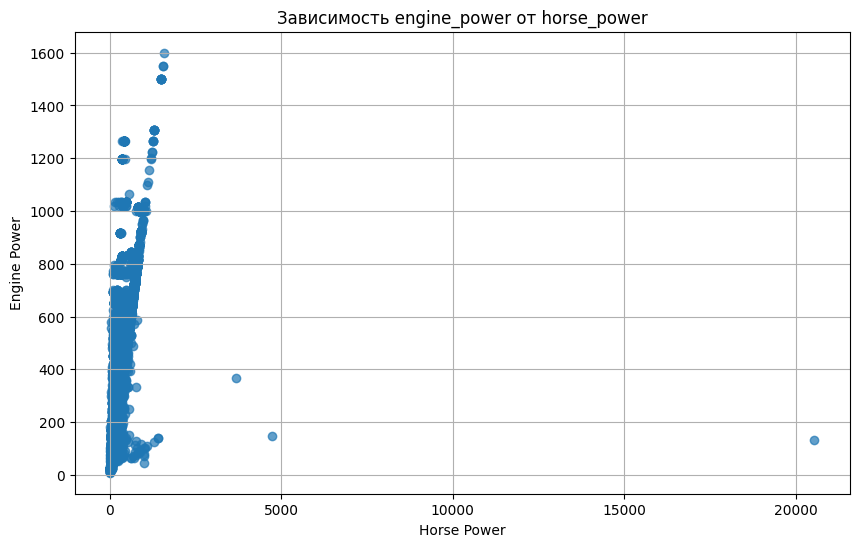

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['horse_power'], df['engine_power'], alpha=0.7)
plt.title('Зависимость engine_power от horse_power')
plt.xlabel('Horse Power')
plt.ylabel('Engine Power')
plt.grid(True)
plt.show()


Я думаю, что признак `horse_power` можно удалить, так как идентичен признаку `engine_power`, но в `engine_power` лежат более осмысленные данные

In [ ]:
df.drop('horse_power', axis=1, inplace=True)

In [ ]:
df.sample()

,production_year,mileage,condition,owners_number,pts_original,accidents_resolution,region,seller_type,brand,model,...,engine_displacement,engine_power,fuel_rate,steering_wheel,price,price_segment,tags,auto_class,equipment,complectation_available_options
371444,2024,135,CONDITION_OK,1,True,NaN,Хабаровск,COMMERCIAL,Nissan,Frontier,...,3799.0,310.0,12.4,LEFT,8530000,MEDIUM,dealer_quarantine_calls;discount;fresh;history...,J,seats-5,NaN


## Анализ выбросов

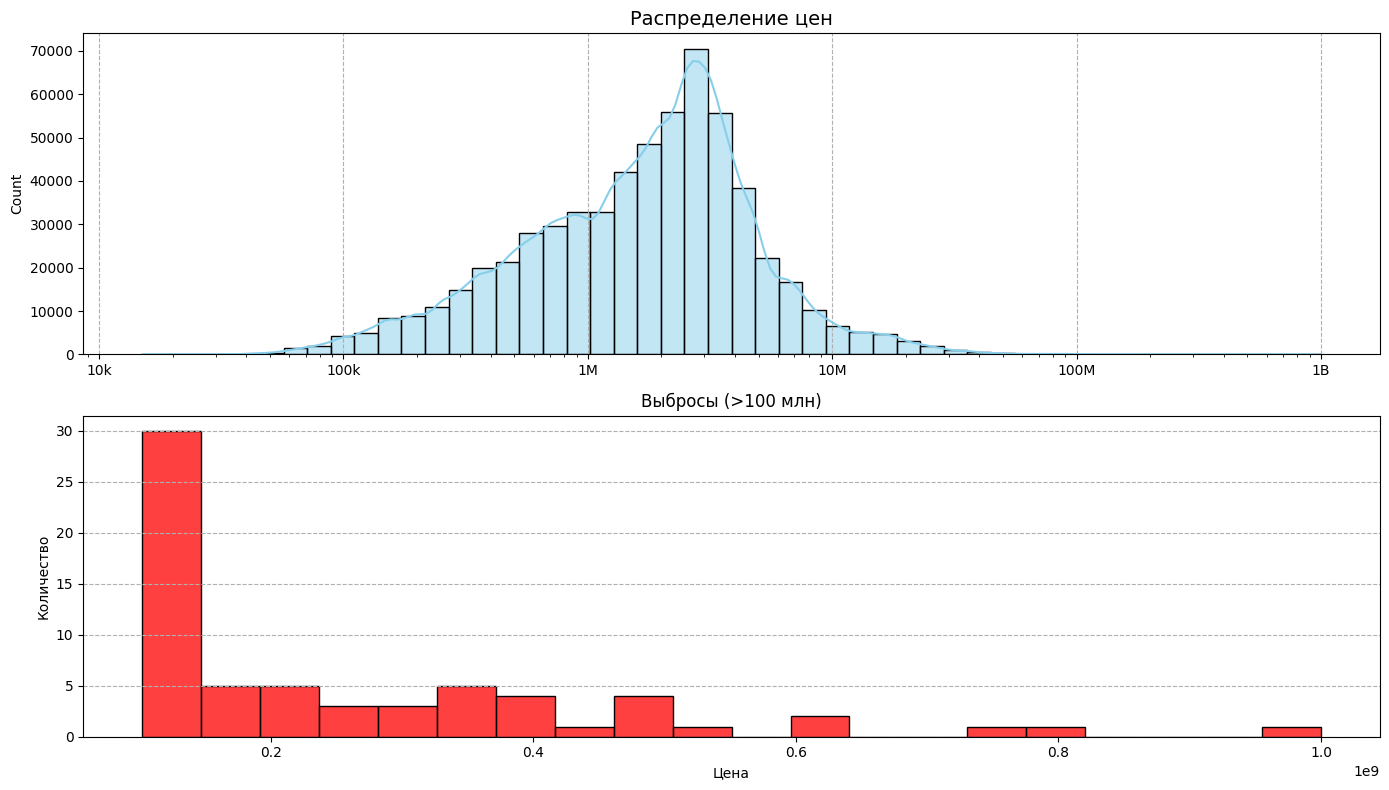

In [13]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
filtered_prices = df['price'][(df['price'] > 0)]
sns.histplot(filtered_prices, kde=True, bins=50, color='skyblue', log_scale=True)
plt.xticks([1e4, 1e5, 1e6, 1e7, 1e8, 1e9], ['10k', '100k', '1M', '10M', '100M', '1B'])
plt.title('Распределение цен', fontsize=14)
plt.xlabel('')
plt.grid(axis='x', linestyle='--')


plt.subplot(2, 1, 2)
outliers = df[df['price'] > 1e8]['price']
sns.histplot(outliers, bins=20, color='red', kde=False)
plt.title('Выбросы (>100 млн)', fontsize=12)
plt.xlabel('Цена', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


In [14]:
price_series = df['price']

outliers_stats = {
    'Цена < 50000': (price_series < 35000).sum(),
    'Цена >= 100M': (price_series >= 100_000_000).sum(),
    'Цена >= 500M': (price_series >= 500_000_000).sum(),
    'Цена >= 1B': (price_series >= 1_000_000_000).sum()
}

for key, value in outliers_stats.items():
    print(f"{key}: {value}")


Цена < 50000: 32
Цена >= 100M: 69
Цена >= 500M: 7
Цена >= 1B: 1


## Изучение распределения признаков и их взаимосвязей

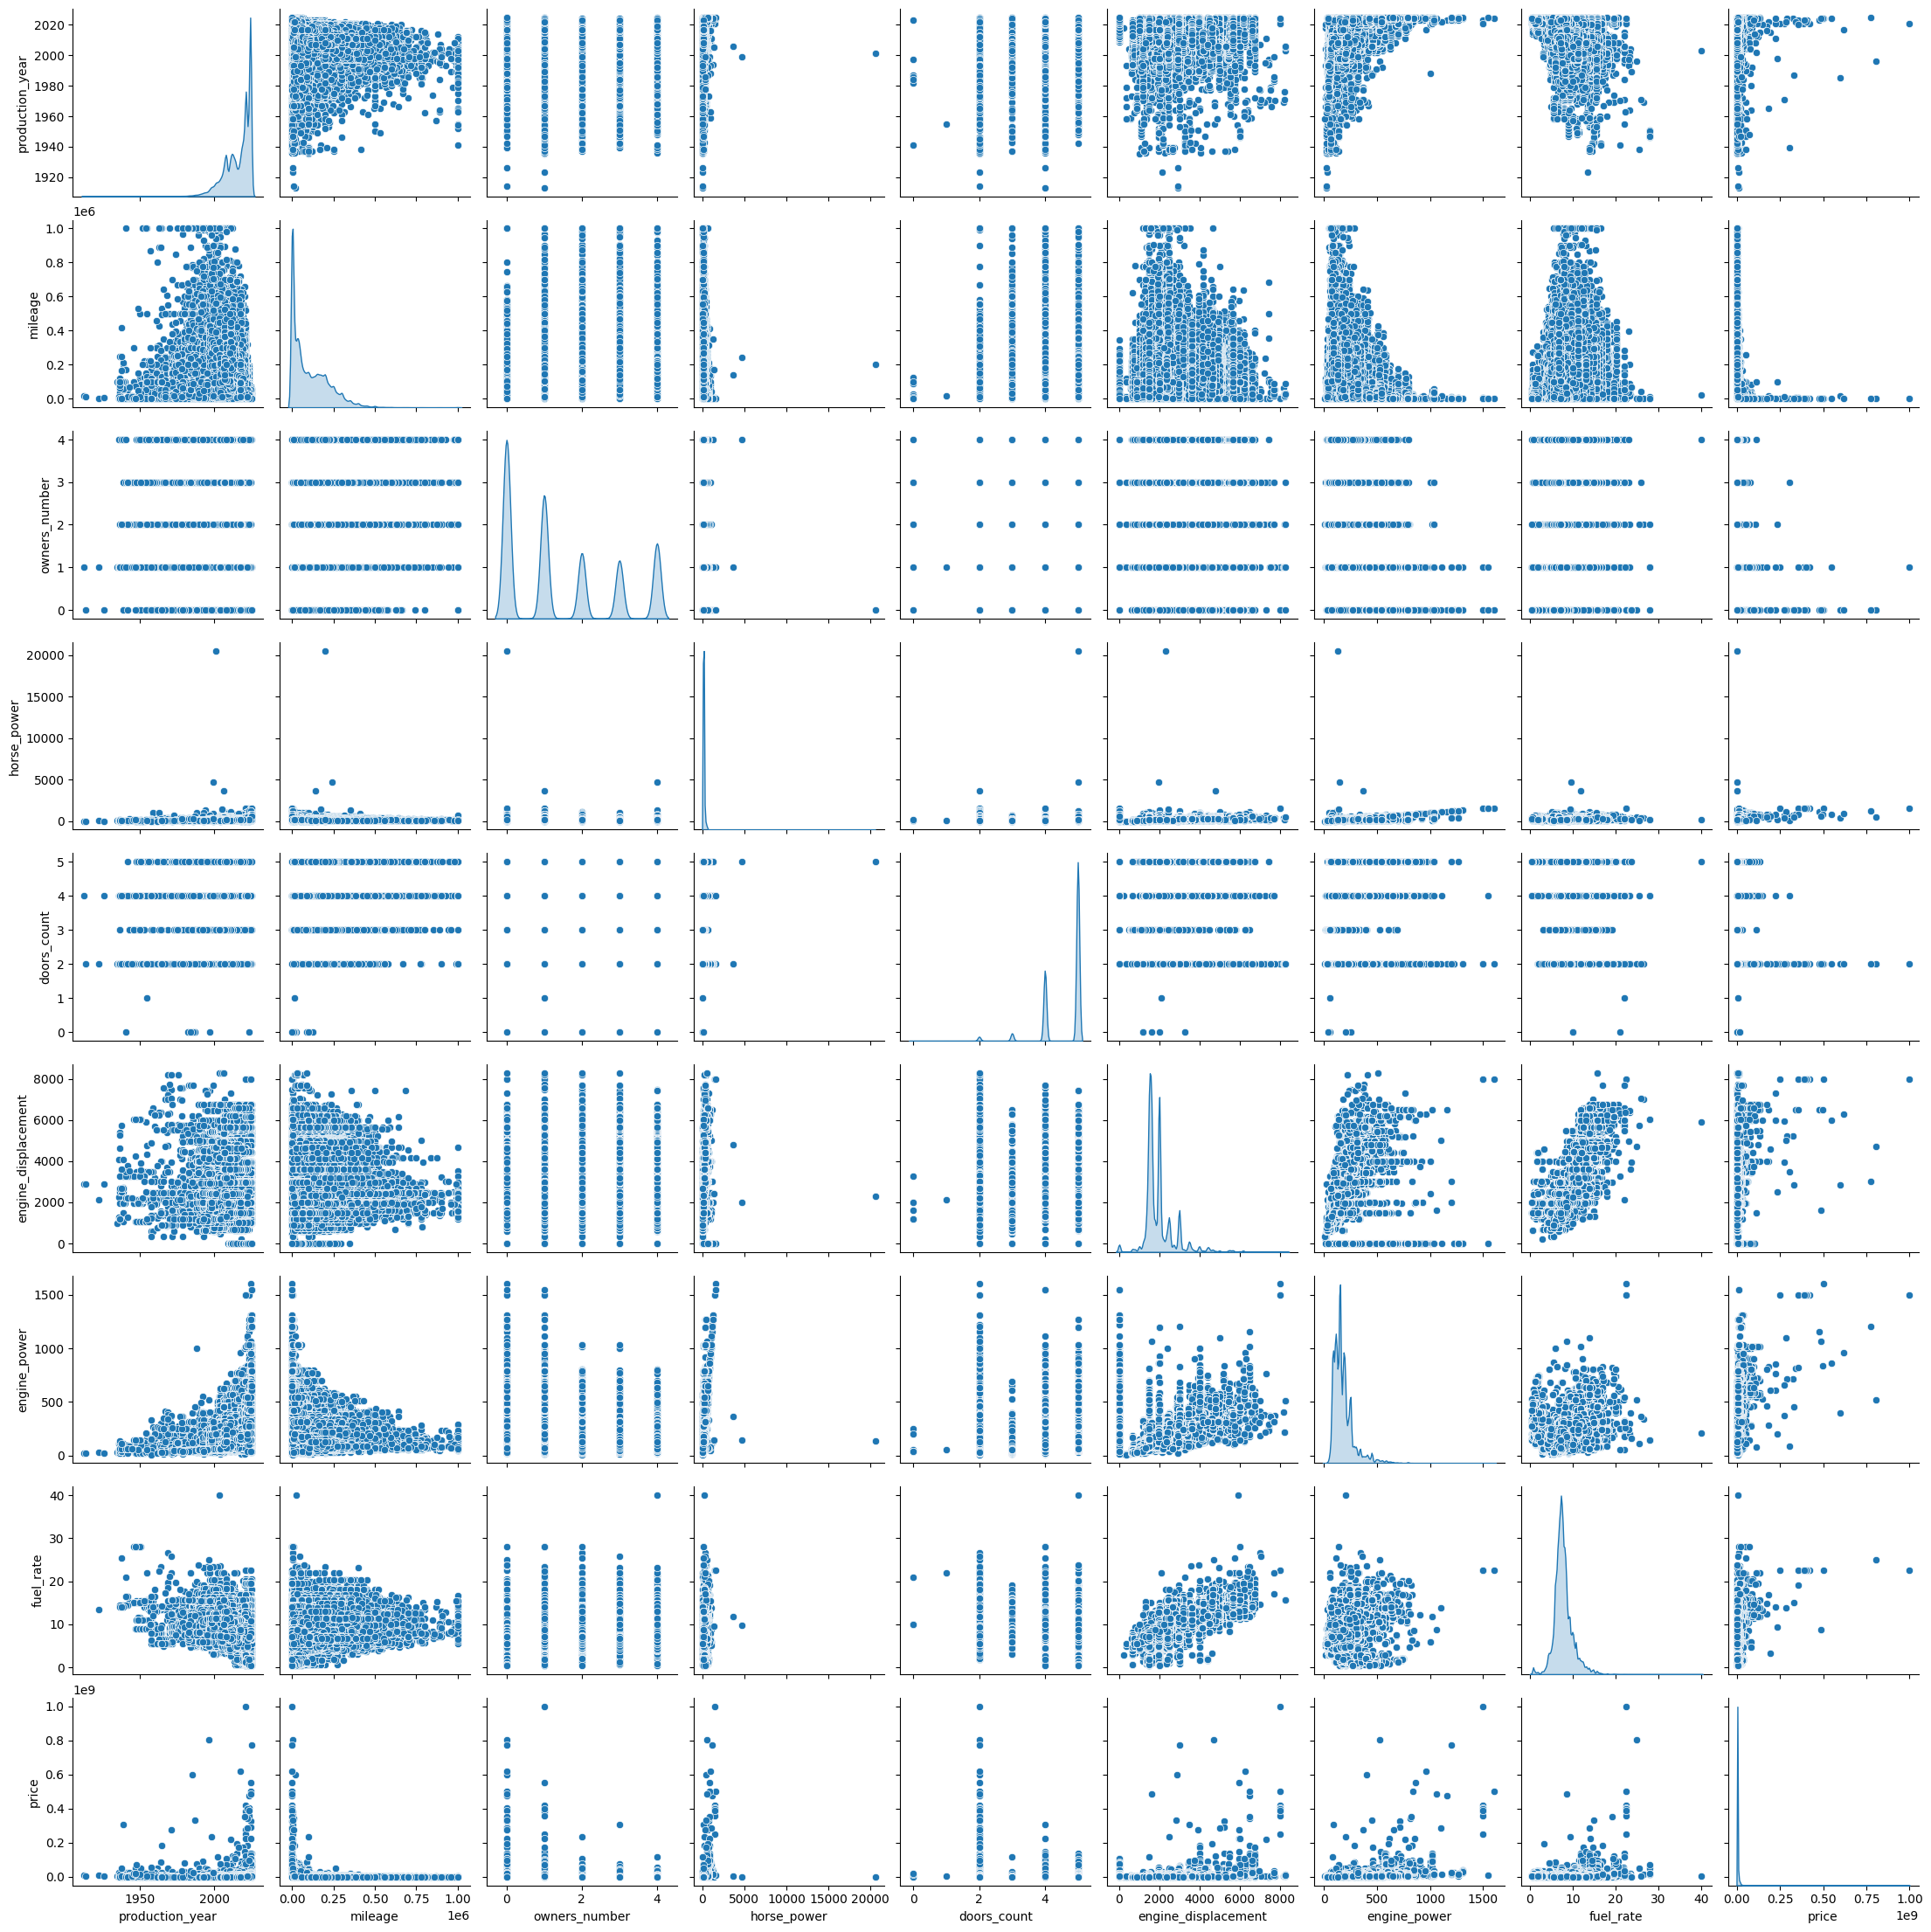

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df[df.select_dtypes(include=np.number).columns.tolist()],
             diag_kind="kde")
plt.show()


# Выводы и план дальнейших действий